# Big Data and AI HW4

By: Manapat Weeramongkolkul

Student ID: 6238171421

In [1]:
# Importing relevant libraries

%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn 
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("./HW3_movie_metadata.csv")

## Explore and Clean Data


In [3]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.tail()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
# Missing values

null_columns = df.columns[df.isnull().any()]
print(null_columns)

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [7]:
df_nonull = df.dropna(how='any')
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3757 non-null   object 
 1   num_critic_for_reviews     3757 non-null   float64
 2   duration                   3757 non-null   float64
 3   director_facebook_likes    3757 non-null   float64
 4   actor_3_facebook_likes     3757 non-null   float64
 5   actor_2_name               3757 non-null   object 
 6   actor_1_facebook_likes     3757 non-null   float64
 7   gross                      3757 non-null   float64
 8   genres                     3757 non-null   object 
 9   actor_1_name               3757 non-null   object 
 10  movie_title                3757 non-null   object 
 11  num_voted_users            3757 non-null   int64  
 12  cast_total_facebook_likes  3757 non-null   int64  
 13  actor_3_name               3757 non-null   objec

In [8]:
original_rows = df.shape[0]
dropped_rows = original_rows - df_nonull.shape[0]
percent_dropped = 100 * dropped_rows / original_rows
print("Percentage of rows dropped: {:.2f}%".format(percent_dropped))

Percentage of rows dropped: 25.50%


In [9]:
df_nonull.describe().round(0)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3.757000e+03,3757.0,3757.0,3757.0,3757.0,3757.0
mean,167.0,110.0,807.0,771.0,7750.0,52599179.0,105799.0,11525.0,1.0,337.0,4.622614e+07,2003.0,2021.0,6.0,2.0,9351.0
std,123.0,23.0,3068.0,1894.0,15518.0,70313480.0,152024.0,19120.0,2.0,411.0,2.259812e+08,10.0,4544.0,1.0,0.0,21461.0
min,2.0,37.0,0.0,0.0,0.0,162.0,91.0,0.0,0.0,4.0,2.180000e+02,1927.0,0.0,2.0,1.0,0.0
25%,77.0,96.0,11.0,194.0,745.0,8243880.0,19655.0,1920.0,0.0,110.0,1.000000e+07,1999.0,385.0,6.0,2.0,0.0
50%,138.0,106.0,64.0,436.0,1000.0,30093107.0,53970.0,4059.0,1.0,210.0,2.500000e+07,2004.0,685.0,7.0,2.0,227.0
75%,224.0,120.0,235.0,691.0,13000.0,66862068.0,128593.0,16237.0,2.0,398.0,5.000000e+07,2010.0,976.0,7.0,2.0,11000.0
max,813.0,330.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,9.0,16.0,349000.0


In [10]:
# Missing values

null_columns = df_nonull.columns[df_nonull.isnull().any()]
print(null_columns)

Index([], dtype='object')


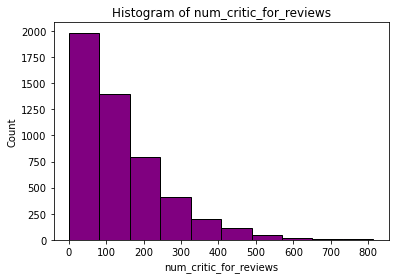

In [11]:
df['num_critic_for_reviews'].hist(color='purple', edgecolor='black')
plt.xlabel('num_critic_for_reviews')
plt.ylabel("Count")
plt.title(f"Histogram of {'num_critic_for_reviews'}")
plt.grid(False)
plt.show()

In [12]:
df_nonull['director_name'].value_counts()

Steven Spielberg       25
Clint Eastwood         19
Woody Allen            19
Ridley Scott           17
Martin Scorsese        16
                       ..
Todd Lincoln            1
Julian Jarrold          1
Peter Farrelly          1
Michel Hazanavicius     1
Shane Carruth           1
Name: director_name, Length: 1659, dtype: int64

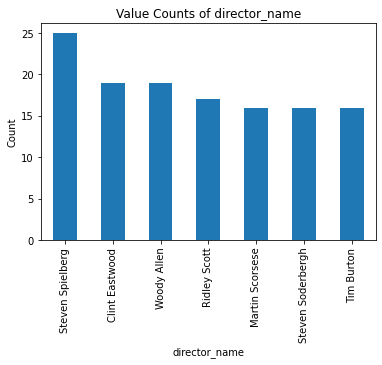

In [13]:
value_counts = df_nonull['director_name'].value_counts()
value_counts = value_counts[value_counts>15]
value_counts.plot(kind='bar')
plt.xlabel('director_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('director_name'))
plt.show()

In [14]:
df_nonull['actor_1_name'].value_counts()

Robert De Niro       42
Johnny Depp          39
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
                     ..
Marisa Saks           1
Peter Firth           1
Isaiah Washington     1
Johnny Lewis          1
John August           1
Name: actor_1_name, Length: 1428, dtype: int64

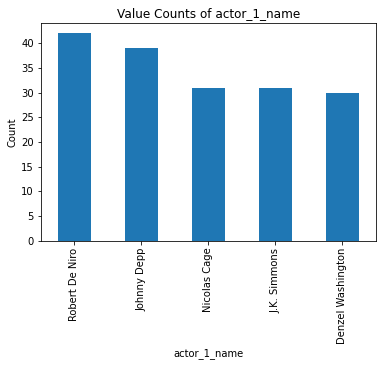

In [15]:
value_counts = df_nonull['actor_1_name'].value_counts()
value_counts = value_counts[value_counts>=30]
value_counts.plot(kind='bar')
plt.xlabel('actor_1_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('actor_1_name'))
plt.show()

In [16]:
df_nonull['actor_2_name'].value_counts()

Morgan Freeman      20
Charlize Theron     14
Brad Pitt           14
James Franco        11
Jason Flemyng       10
                    ..
Mary McCormack       1
Bob Clendenin        1
Oleg Taktarov        1
Richard Sammel       1
Brian Herzlinger     1
Name: actor_2_name, Length: 2189, dtype: int64

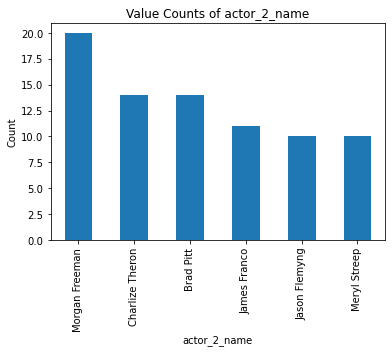

In [17]:
value_counts = df_nonull['actor_2_name'].value_counts()
value_counts = value_counts[value_counts>=10]
value_counts.plot(kind='bar')
plt.xlabel('actor_2_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('actor_2_name'))
plt.show()

In [18]:
df_nonull['actor_3_name'].value_counts()

Steve Coogan         8
Robert Duvall        7
Kirsten Dunst        7
Ben Mendelsohn       7
Anne Hathaway        7
                    ..
Nina Arianda         1
Christa B. Allen     1
Bonnie Somerville    1
Candice Bergen       1
Jon Gunn             1
Name: actor_3_name, Length: 2588, dtype: int64

In [19]:
df_nonull['genres'].value_counts()

Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                                        ... 
Action|Drama|Fantasy|Horror|Thriller       1
Action|Thriller|Western                    1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64

In [20]:
df_nonull['content_rating'].value_counts()

R            1700
PG-13        1309
PG            566
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

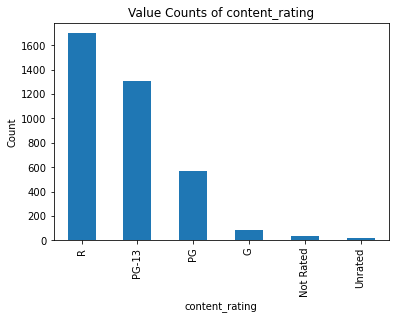

In [21]:
value_counts = df_nonull['content_rating'].value_counts()
value_counts = value_counts[value_counts>=20]
value_counts.plot(kind='bar')
plt.xlabel('content_rating')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('content_rating'))
plt.show()

In [22]:
df_nonull['movie_title'].value_counts()

Victor Frankenstein          3
The Fast and the Furious     3
King Kong                    3
Pan                          3
Halloween                    3
                            ..
Serenity                     1
Against the Ropes            1
Superman III                 1
Grudge Match                 1
My Date with Drew            1
Name: movie_title, Length: 3656, dtype: int64

In [23]:
df_nonull['movie_imdb_link'].value_counts()

http://www.imdb.com/title/tt3332064/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0077651/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt1976009/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0232500/?ref_=fn_tt_tt_1    3
                                                       ..
http://www.imdb.com/title/tt0379786/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0312329/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0086393/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt1661382/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0378407/?ref_=fn_tt_tt_1    1
Name: movie_imdb_link, Length: 3657, dtype: int64

In [24]:
df_nonull['language'].value_counts()

English       3599
French          34
Spanish         23
Mandarin        15
German          10
Japanese        10
Cantonese        7
Italian          7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Mongolian        1
None             1
Romanian         1
Vietnamese       1
Arabic           1
Hebrew           1
Zulu             1
Czech            1
Russian          1
Filipino         1
Maya             1
Kazakh           1
Hungarian        1
Aramaic          1
Bosnian          1
Name: language, dtype: int64

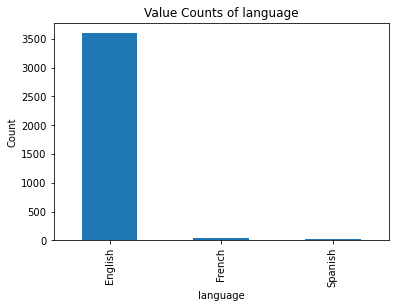

In [25]:
value_counts = df_nonull['language'].value_counts()
value_counts = value_counts[value_counts>=20]
value_counts.plot(kind='bar')
plt.xlabel('language')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('language'))
plt.show()

In [26]:
df_nonull['country'].value_counts()

USA               2987
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
China               14
Hong Kong           13
Italy               11
New Zealand         11
South Korea          8
Denmark              8
Ireland              7
Mexico               6
Brazil               5
India                5
Iran                 4
Thailand             4
Norway               4
Russia               3
Argentina            3
Netherlands          3
South Africa         3
Czech Republic       3
Hungary              2
Taiwan               2
Romania              2
Finland              1
Indonesia            1
Israel               1
Poland               1
Colombia             1
New Line             1
Iceland              1
Aruba                1
Peru                 1
Belgium              1
Georgia              1
West Germany         1
Chile                1
Official site        1
Greece     

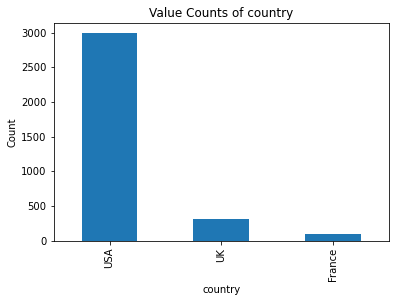

In [27]:
value_counts = df_nonull['country'].value_counts()
value_counts = value_counts[value_counts>=100]
value_counts.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('country'))
plt.show()

In [28]:
# Drop some categorical data

# df_dropped = df_nonull.drop(columns=['genres','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating'])
# df_dropped = df_nonull.drop(columns=['genres','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country'])
df_dropped = df_nonull.drop(columns=['genres','movie_title','actor_3_name','plot_keywords','movie_imdb_link'])
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3757 non-null   object 
 1   num_critic_for_reviews     3757 non-null   float64
 2   duration                   3757 non-null   float64
 3   director_facebook_likes    3757 non-null   float64
 4   actor_3_facebook_likes     3757 non-null   float64
 5   actor_2_name               3757 non-null   object 
 6   actor_1_facebook_likes     3757 non-null   float64
 7   gross                      3757 non-null   float64
 8   actor_1_name               3757 non-null   object 
 9   num_voted_users            3757 non-null   int64  
 10  cast_total_facebook_likes  3757 non-null   int64  
 11  facenumber_in_poster       3757 non-null   float64
 12  num_user_for_reviews       3757 non-null   float64
 13  language                   3757 non-null   objec

In [29]:
null_columns = df_dropped.columns[df_dropped.isnull().any()]
print(null_columns)

Index([], dtype='object')


In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def onehot_top_k(df, column, threshold):
    values_count = df[column].value_counts()
    frequent_values = values_count[values_count >= threshold].index.tolist()
    df[column] = df[column].apply(lambda x: x if x in frequent_values else 'others')
    onehot = OneHotEncoder()
    onehot_values = onehot.fit_transform(df[[column]]).toarray()
    onehot_labels = [f"{column}_{val}" for val in onehot.categories_[0]]
    onehot_df = pd.DataFrame(onehot_values, columns=onehot_labels)
    df = pd.concat([df.reset_index(drop=True), onehot_df.reset_index(drop=True)], axis=1) # MUST RESET INDEX
    df = df.drop(column, axis=1)
    return df

df_dropped = onehot_top_k(df_dropped, 'director_name', 19)
df_dropped = onehot_top_k(df_dropped, 'actor_1_name', 35)
df_dropped = onehot_top_k(df_dropped, 'actor_2_name', 20)
df_dropped = onehot_top_k(df_dropped, 'content_rating', 500)
df_dropped = onehot_top_k(df_dropped, 'language', 3000)
df_dropped = onehot_top_k(df_dropped, 'country', 2000)
df_dropped

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_name_Morgan Freeman,actor_2_name_others,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,language_English,language_others,country_USA,country_others
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3753,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3754,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3755,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [31]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num_critic_for_reviews          3757 non-null   float64
 1   duration                        3757 non-null   float64
 2   director_facebook_likes         3757 non-null   float64
 3   actor_3_facebook_likes          3757 non-null   float64
 4   actor_1_facebook_likes          3757 non-null   float64
 5   gross                           3757 non-null   float64
 6   num_voted_users                 3757 non-null   int64  
 7   cast_total_facebook_likes       3757 non-null   int64  
 8   facenumber_in_poster            3757 non-null   float64
 9   num_user_for_reviews            3757 non-null   float64
 10  budget                          3757 non-null   float64
 11  title_year                      3757 non-null   float64
 12  actor_2_facebook_likes          37

In [32]:
null_columns = df_dropped.columns[df_dropped.isnull().any()]
print(null_columns)

Index([], dtype='object')


In [33]:
df_dropped[['director_name_others']].value_counts()

director_name_others
1.0                     3694
0.0                       63
dtype: int64

In [34]:
df_dropped.corr(),

(                                num_critic_for_reviews  duration  \
 num_critic_for_reviews                        1.000000  0.228671   
 duration                                      0.228671  1.000000   
 director_facebook_likes                       0.175166  0.180659   
 actor_3_facebook_likes                        0.252795  0.125808   
 actor_1_facebook_likes                        0.166069  0.083661   
 gross                                         0.464279  0.245760   
 num_voted_users                               0.592535  0.339618   
 cast_total_facebook_likes                     0.236614  0.120210   
 facenumber_in_poster                         -0.034197  0.026967   
 num_user_for_reviews                          0.563763  0.351620   
 budget                                        0.104748  0.068024   
 title_year                                    0.419925 -0.130258   
 actor_2_facebook_likes                        0.253170  0.128955   
 imdb_score                       

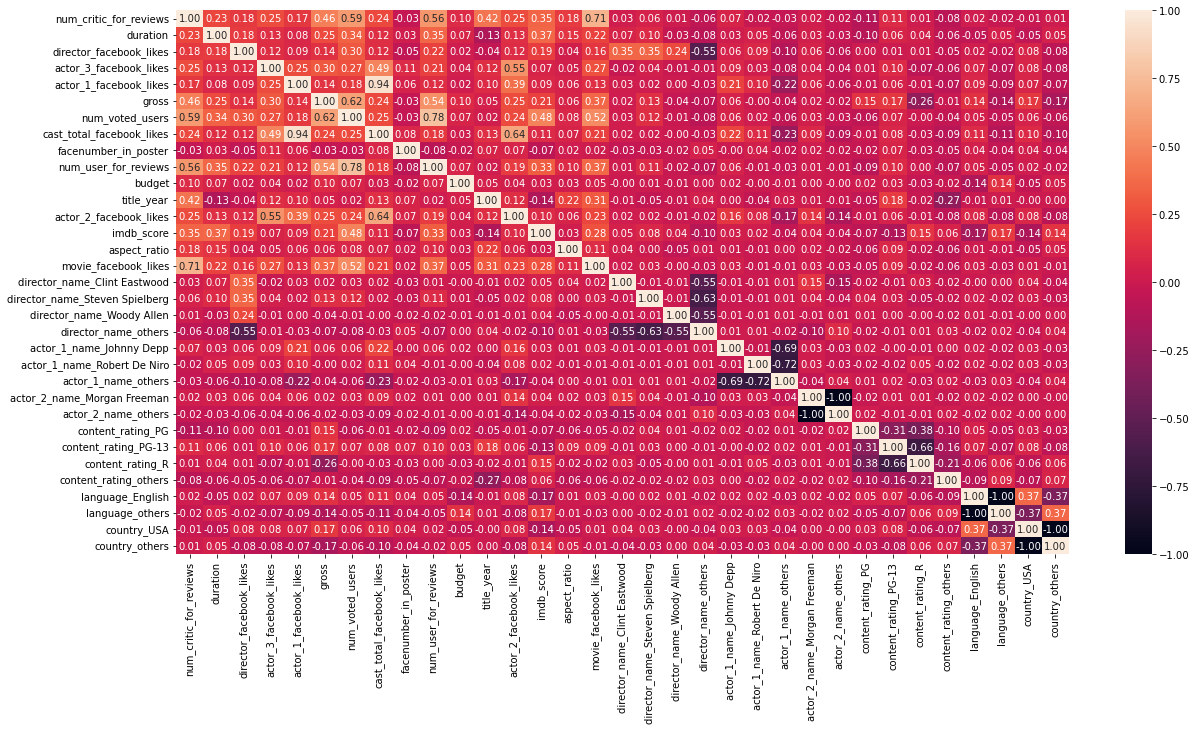

In [35]:
plt.figure(figsize = (20,10))
dataplot = sns.heatmap(df_dropped.corr(), annot=True, fmt=".2f")
plt.show()

num_voted_users, num_user_for_review, movie_facebook_likes all ok candidates

In [36]:
# y need to have strong corr with all x, but there should be low corr among x

mycols=['num_critic_for_reviews','num_voted_users','num_user_for_reviews','movie_facebook_likes']
df_dropped[mycols].corr().round(2)

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
num_critic_for_reviews,1.00,0.59,0.56,0.71
num_voted_users,0.59,1.00,0.78,0.52
num_user_for_reviews,0.56,0.78,1.00,0.37
movie_facebook_likes,0.71,0.52,0.37,1.00


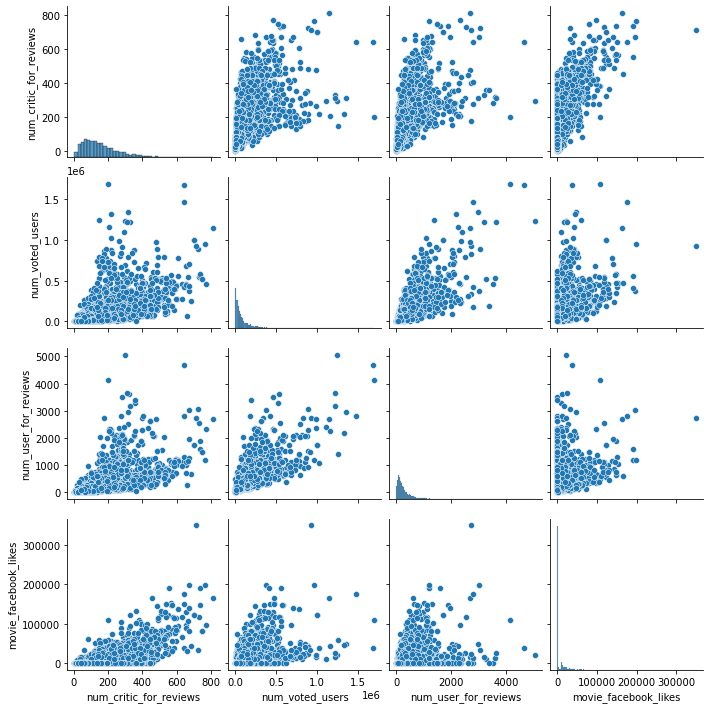

In [37]:
sns.pairplot(df_dropped[mycols])

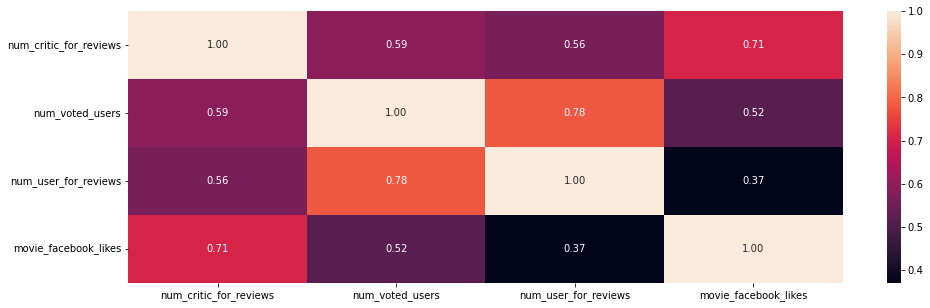

In [38]:
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(df_dropped[mycols].corr(), annot=True, fmt=".2f")
plt.show()

movie_facebook_likes must have

num_voted_users have 0.52 corr with movie_facebook_likes so no

num_user_for_reviews ok too since 0.37 corr with movie_facebook_likes

num_voted_users have 0.78 corr with num_user_for_reviews too so no for it once again

In [39]:
X = df_dropped.drop('num_critic_for_reviews', axis=1)
y = df_dropped['num_critic_for_reviews']

In [40]:
from sklearn.preprocessing import MinMaxScaler

column_names = X.columns.tolist()
scaler = MinMaxScaler() # default = (0, 1)
X = pd.DataFrame(scaler.fit_transform(X), columns = column_names)
X.describe().round(1)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,...,actor_2_name_Morgan Freeman,actor_2_name_others,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,language_English,language_others,country_USA,country_others
count,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,...,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0,3757.0
mean,0.3,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.0,...,0.0,1.0,0.2,0.3,0.5,0.0,1.0,0.0,0.8,0.2
std,0.1,0.1,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0,...,0.1,0.1,0.4,0.5,0.5,0.2,0.2,0.2,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
50%,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
75%,0.3,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
# Training, Testing Split

from sklearn.model_selection import train_test_split

# 90:10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, shuffle=True)

In [42]:
# Exclude this cell if want to run experiment

X_train = X_train[['movie_facebook_likes','num_user_for_reviews']]
X_test = X_test[['movie_facebook_likes','num_user_for_reviews']]

## Model

In [43]:
# Evaluation Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

### Linear Regressor

In [44]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)

In [45]:
print('Linear Regression Parameters')
print('----------------------------')
print('coeffs are ', linear_reg.coef_)
print('intercept is ', linear_reg.intercept_)

Linear Regression Parameters
----------------------------
coeffs are  [1120.61548173  587.50855307]
intercept is  98.59490349860042


In [46]:
y_pred =linear_reg.predict(X_train)
print('Training Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_train,y_pred))
print('mse is ', mean_squared_error(y_train,y_pred))
print('mae is ', mean_absolute_percentage_error(y_train,y_pred))

Training Dataset
----------------------------
r2_score is  0.6058148512212547
mse is  5855.573923292564
mae is  0.8036734511644258


In [47]:
y_pred =linear_reg.predict(X_test)
print('Testing Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_test,y_pred))
print('mse is ', mean_squared_error(y_test,y_pred))
print('mae is ', mean_absolute_percentage_error(y_test,y_pred))

Testing Dataset
----------------------------
r2_score is  0.5878663333459707
mse is  6877.601736746743
mae is  0.6598781103486199


Text(0, 0.5, 'y_pred')

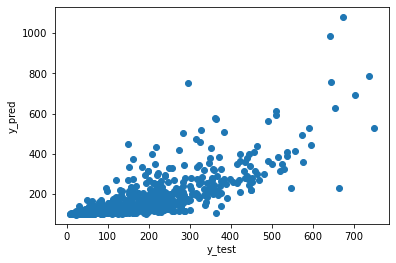

In [48]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

The plot above should be in mostly the same line (straight line)

### SGD Regressor
 

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [50]:
print('SGD Regression Parameters')
print('----------------------------')
print('coeffs are ', sgd_reg.coef_)
print('intercept is ', sgd_reg.intercept_)

SGD Regression Parameters
----------------------------
coeffs are  [1011.23548006  620.43864125]
intercept is  [99.33430522]


In [51]:
y_pred =sgd_reg.predict(X_train)
print('Training Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_train,y_pred))
print('mse is ', mean_squared_error(y_train,y_pred))
print('mae is ', mean_absolute_percentage_error(y_train,y_pred))

Training Dataset
----------------------------
r2_score is  0.6032218554696147
mse is  5894.09256955195
mae is  0.813534839105985


In [52]:
y_pred =sgd_reg.predict(X_test)
print('Testing Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_test,y_pred))
print('mse is ', mean_squared_error(y_test,y_pred))
print('mae is ', mean_absolute_percentage_error(y_test,y_pred))

Testing Dataset
----------------------------
r2_score is  0.5776326078243146
mse is  7048.3800402824645
mae is  0.6694066151540933


Text(0, 0.5, 'y_test_pred')

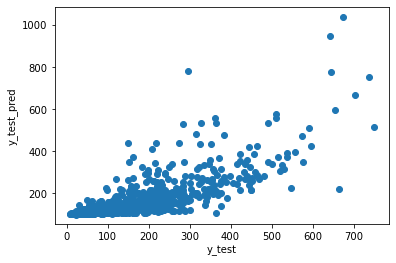

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')